In [1]:
import copy
import numpy as np
import pandas as pd
from tableshift.core.tasks import _TASK_REGISTRY
from tableshift import get_dataset

from tableshift.configs.benchmark_configs import BENCHMARK_CONFIGS

In [91]:

splits    = ['train',
             'validation',
             'id_test',
             'ood_test',
             'ood_validation']


data = [
    [ 'ASSISTments',             'assistments'             ],
    [ 'Childhood Lead',          'nhanes_lead'             ],
    [ 'College Scorecard',       'college_scorecard'       ], 
    [ 'Diabetes',                'brfss_diabetes'          ],
    [ 'FICO HELOC',              'heloc'                   ],
    [ 'Food Stamps',             'acsfoodstamps'           ],
    [ 'Hospital Readmission',    'diabetes_readmission'    ],    
    [ 'Hypertension',            'brfss_blood_pressure'    ],    
    #[ 'ICU Length of Stay'       'mimic_extract_los_3'     ],    
    #[ 'ICU Mortality',           'mimic_extract_mort_hosp' ],        
    [ 'Income',                  'acsincome'               ],
    #[ 'Public Health Insurance', 'acspubcov'               ],
    [ 'Sepsis',                  'physionet'               ],
    [ 'Unemployment',            'acsunemployment'         ],
    [ 'Voting',                  'anes'                    ]
    ]


8

In [25]:
result = {}
for dataset,identifier in data:
    
    dset = get_dataset(
        name=identifier,
        initialize_data=False,
        use_cached=True
    )

    X_a, y_a, _, _ = dset.get_pandas('train')
    X_id, y_id, _, _ = dset.get_pandas('id_test')
    X_b, y_b, _, _ = dset.get_pandas('ood_test')
    
    if X_a.isna().sum().sum():
        result[identifier] = (X_a.isna().sum()/X_a.shape[0]).to_dict()
result

{'college_scorecard': {'STABBR': 0.0,
  'AccredAgency': 0.9636856203579691,
  'sch_deg': 0.17701611266691017,
  'main': 0.0,
  'NUMBRANCH': 0.0,
  'HIGHDEG': 0.0,
  'CONTROL': 0.00020293031373026503,
  'region': 0.0002638094078493445,
  'LOCALE': 0.952514306587118,
  'locale2': 1.0,
  'CCSIZSET': 0.9799910710661959,
  'HBCU': 0.9524940135557449,
  'ADM_RATE': 0.7301229757701205,
  'ADM_RATE_ALL': 0.7043305328950038,
  'SATVRMID': 0.874406428832339,
  'SATMTMID': 0.8736454401558504,
  'SATWRMID': 0.9580238646048946,
  'ACTCMMID': 0.8763545598441496,
  'ACTENMID': 0.8972056495799342,
  'ACTMTMID': 0.897337554283859,
  'ACTWRMID': 0.9892345468566094,
  'PCIP01': 0.07515524169000365,
  'PCIP03': 0.07515524169000365,
  'PCIP04': 0.07515524169000365,
  'PCIP05': 0.07515524169000365,
  'PCIP09': 0.07515524169000365,
  'PCIP10': 0.07515524169000365,
  'PCIP11': 0.07515524169000365,
  'PCIP12': 0.07515524169000365,
  'PCIP13': 0.07515524169000365,
  'PCIP14': 0.07515524169000365,
  'PCIP15': 0.

In [24]:
(X_a.isna().sum()/X_a.shape[0]).to_dict()

{'STABBR': 0.0,
 'AccredAgency': 0.9636856203579691,
 'sch_deg': 0.17701611266691017,
 'main': 0.0,
 'NUMBRANCH': 0.0,
 'HIGHDEG': 0.0,
 'CONTROL': 0.00020293031373026503,
 'region': 0.0002638094078493445,
 'LOCALE': 0.952514306587118,
 'locale2': 1.0,
 'CCSIZSET': 0.9799910710661959,
 'HBCU': 0.9524940135557449,
 'ADM_RATE': 0.7301229757701205,
 'ADM_RATE_ALL': 0.7043305328950038,
 'SATVRMID': 0.874406428832339,
 'SATMTMID': 0.8736454401558504,
 'SATWRMID': 0.9580238646048946,
 'ACTCMMID': 0.8763545598441496,
 'ACTENMID': 0.8972056495799342,
 'ACTMTMID': 0.897337554283859,
 'ACTWRMID': 0.9892345468566094,
 'PCIP01': 0.07515524169000365,
 'PCIP03': 0.07515524169000365,
 'PCIP04': 0.07515524169000365,
 'PCIP05': 0.07515524169000365,
 'PCIP09': 0.07515524169000365,
 'PCIP10': 0.07515524169000365,
 'PCIP11': 0.07515524169000365,
 'PCIP12': 0.07515524169000365,
 'PCIP13': 0.07515524169000365,
 'PCIP14': 0.07515524169000365,
 'PCIP15': 0.07515524169000365,
 'PCIP16': 0.07515524169000365,
 '

In [8]:
import json

In [11]:
result

{'college_scorecard': STABBR           0.000000
 AccredAgency     0.963686
 sch_deg          0.177016
 main             0.000000
 NUMBRANCH        0.000000
                    ...   
 pct_grad_prof    0.748346
 pct_born_us      0.748346
 median_hh_inc    0.747007
 poverty_rate     0.747007
 unemp_rate       0.747007
 Length: 118, dtype: float64,
 'brfss_diabetes': CHECKUP1                 0.009913
 EDUCA                    0.001411
 TOLDHI                   0.000000
 SEX                      0.000000
 MEDCOST                  0.001629
 RFBING5                  0.005390
 MICHD                    0.007526
 VEG_ONCE_PER_DAY         0.059162
 MARITAL                  0.003334
 BMI5CAT                  0.000000
 DRNK_PER_WEEK            0.000000
 BMI5                     0.000000
 SMOKE100                 0.004401
 CVDSTRK3                 0.002314
 PHYSHLTH                 0.000000
 CHOL_CHK_PAST_5_YEARS    0.045540
 TOTINDA                  0.018144
 HIGH_BLOOD_PRESS         0.002190
 IYE

In [73]:
print(json.dumps(result))

{"college_scorecard": {"STABBR": 0.0, "AccredAgency": 0.9636856203579691, "sch_deg": 0.17701611266691017, "main": 0.0, "NUMBRANCH": 0.0, "HIGHDEG": 0.0, "CONTROL": 0.00020293031373026503, "region": 0.0002638094078493445, "LOCALE": 0.952514306587118, "locale2": 1.0, "CCSIZSET": 0.9799910710661959, "HBCU": 0.9524940135557449, "ADM_RATE": 0.7301229757701205, "ADM_RATE_ALL": 0.7043305328950038, "SATVRMID": 0.874406428832339, "SATMTMID": 0.8736454401558504, "SATWRMID": 0.9580238646048946, "ACTCMMID": 0.8763545598441496, "ACTENMID": 0.8972056495799342, "ACTMTMID": 0.897337554283859, "ACTWRMID": 0.9892345468566094, "PCIP01": 0.07515524169000365, "PCIP03": 0.07515524169000365, "PCIP04": 0.07515524169000365, "PCIP05": 0.07515524169000365, "PCIP09": 0.07515524169000365, "PCIP10": 0.07515524169000365, "PCIP11": 0.07515524169000365, "PCIP12": 0.07515524169000365, "PCIP13": 0.07515524169000365, "PCIP14": 0.07515524169000365, "PCIP15": 0.07515524169000365, "PCIP16": 0.07515524169000365, "PCIP19": 0.

<Axes: title={'center': 'college_scorecard'}>

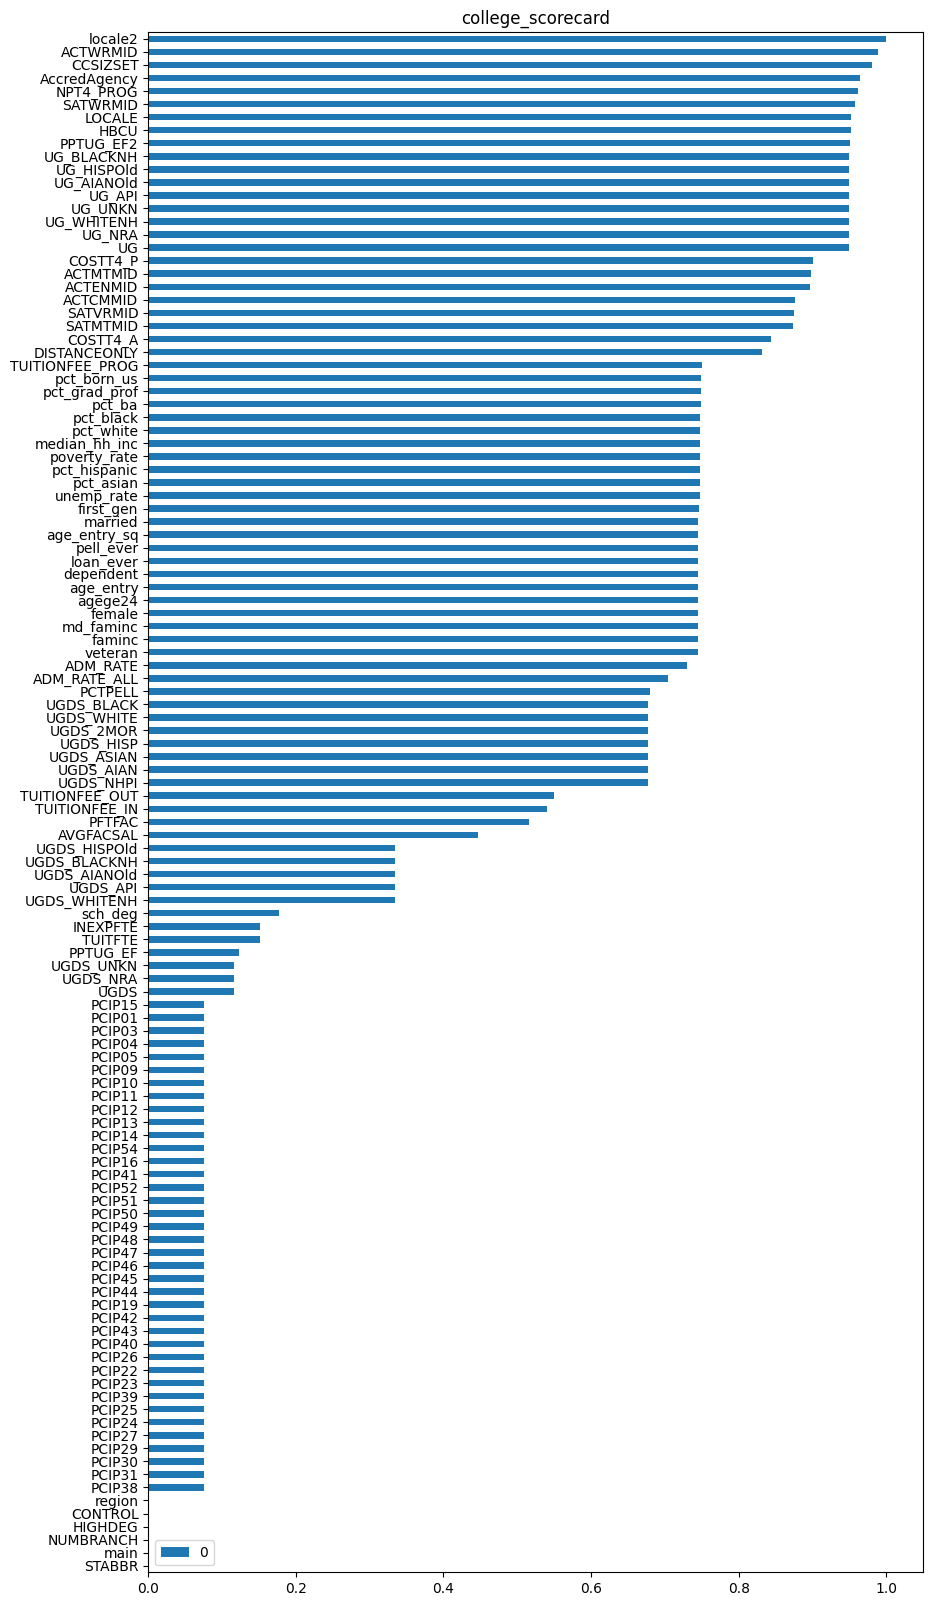

In [76]:
identifier = list(result.keys())[0]
pd.DataFrame.from_dict(result[identifier], orient='index').sort_values(by=0).plot(kind='barh', title=identifier, figsize=(10, 20) )

In [86]:
identifier = list(result.keys())[0]
len(result[identifier])

118

In [87]:
identifier = list(result.keys())[4]


18

In [90]:
data

,0
CHCOCNCR,0.002112
SEX,0.000000
SMOKDAY2,0.000000
RFBING5,0.006529
CHCSCNCR,0.003262
DIABETES,0.000000
IYEAR,0.000000
SMOKE100,0.005041
TOTINDA,0.018585
STATE,0.000000


In [106]:
from rich.console import Console
console = Console()
console.print("[bold blue]Hello World[/]")
with console.capture() as capture:
    console.print("[bold magenta]Hello World[/]")
print(capture.get())

Hello World

Hello World



In [110]:
console.print(df, style='simple')

MissingStyle: Failed to get style 'simple'; unable to parse 'simple' as color; 'simple' is not a valid color

matplotlib.axes._axes.Axes

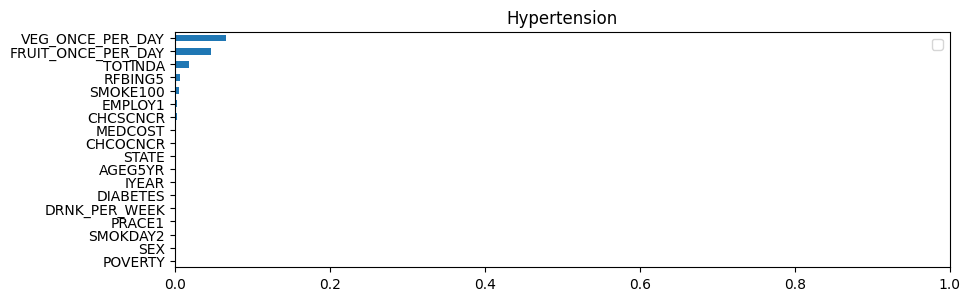

In [104]:
identifier = list(result.keys())[4]
data_idx = np.where(np.array(data)[:,1]==identifier)[0][0]
dataset = data[data_idx][0]
v_vize = len(result[identifier])*0.17
df = pd.DataFrame.from_dict(result[identifier], orient='index')
df_sorted = df.sort_values(by=0)
ax = df_sorted.plot(kind='barh', figsize=(10, v_vize))
ax.set_title(dataset)
ax.set_xlim(0,1)
ax.legend([])
type(ax)

In [36]:
import matplotlib.pyplot as plt

In [ ]:
fig, ax = plt.subplots()

dict(sorted(d.items(), key = lambda x: x[1], reverse = True))
ax.barh(y_pos, performance, xerr=error, align='center')

In [ ]:
def balanced_weight_vector(y: np.ndarray) -> np.ndarray:
    error = ValueError("y must be a 1D numpy array")
    try:
        if y.ndim == 1:
            classes, freq = np.unique(y, return_counts=True)
            maj_index = freq.argmax()
            maj_class = classes[maj_index]
            maj_weight = freq.min()/freq.max()
            min_weight = 1
            return np.array([maj_weight if y_j == maj_class else min_weight for y_j in y])
        else:
            raise error
    
    except:
        raise error

In [5]:
for i,d in enumerate(data):
    
    expt_config = BENCHMARK_CONFIGS[d[1]]
    expt_config.preprocessor_config.categorical_features = 'passthrough'
    expt_config.preprocessor_config.numeric_features = 'passthrough'
    expt_config.preprocessor_config

    
    dset = get_dataset(
        d[1],
        preprocessor_config = expt_config.preprocessor_config,
        use_cache = True
    )
    X_, y_, _, _ = dset.get_pandas('train')
    
    print(len(y_))

/bin/sh: 1: kaggle: not found


2132526


/home/fslab/github/mixed/tableshift/core/data_source.py:359: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df["nhanes_year"] = int(year)


11807


/bin/sh: 1: kaggle: not found
/home/fslab/github/mixed/tableshift/core/data_source.py:74: DtypeWarning: Columns (2,7,8,9,10,20,24,25,26,27,28,29,30,31,32,33,34,35,36,100,101,102,290,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,64

98556


In [3]:
columns=['dataset', 'column', 'partition', 'min', 'max', 'median', 'unique', 'n_class', 'p_class', 'instances']
results = pd.DataFrame(columns=columns)
for i,d in enumerate(data):
    X = []
    y = []
    dset = get_dataset(d[1],
        cache_dir='../tableshift/tmp', 
        use_cached=True
    )
    for k,s in enumerate(splits):
        X_, y_, _, _ = dset.get_pandas(s)
        X.append(X_)
        y.append(y_)
    X_a = pd.concat(X[0:3])
    X_b = pd.concat(X[3:5])
    y_a = np.concatenate(y[0:3])
    y_b = np.concatenate(y[3:5])
    
    n_class_a = np.count_nonzero(y_a == 0)
    p_class_a = np.count_nonzero(y_a == 1)
    
    n_class_b = np.count_nonzero(y_b == 0)
    p_class_b = np.count_nonzero(y_b == 1)
    
    n_a = len(y_a)
    n_b = len(y_b)
    
    for j,c in enumerate(X_a.columns):
        results.loc[len(results)] = [d[0], c, 'A', X_a[c].min(), X_a[c].max(), X_a[c].median(), X_a[c].nunique(), n_class_a/n_a, p_class_a/n_a, n_a]
        results.loc[len(results)] = [d[0], c, 'B', X_b[c].min(), X_b[c].max(), X_b[c].median(), X_b[c].nunique(), n_class_b/n_b, p_class_b/n_b, n_b]

In [75]:
d

['Voting', 'anes']

In [74]:
dset.features

['VCF0004',
 'VCF0101',
 'VCF0218',
 'VCF0224',
 'VCF0428',
 'VCF0429',
 'VCF0115_no answer',
 'VCF0115_20',
 'VCF0115_60',
 'VCF0115_30',
 'VCF0115_40',
 'VCF0115_50',
 'VCF0115_10',
 'VCF0115_00',
 'VCF0140a_no answer',
 'VCF0140a_30',
 'VCF0140a_10',
 'VCF0140a_20',
 'VCF0140a_40',
 'VCF0140a_60',
 'VCF0140a_50',
 'VCF0140a_90',
 'VCF0140a_70',
 'VCF0140a_80',
 'VCF0301_no answer',
 'VCF0301_60',
 'VCF0301_50',
 'VCF0301_40',
 'VCF0301_70',
 'VCF0301_30',
 'VCF0301_20',
 'VCF0301_00',
 'VCF0301_10',
 'VCF0302_no answer',
 'VCF0302_10',
 'VCF0302_50',
 'VCF0302_20',
 'VCF0302_30',
 'VCF0302_90',
 'VCF0302_80',
 'VCF0302_40',
 'VCF0310_no answer',
 'VCF0310_30',
 'VCF0310_20',
 'VCF0310_10',
 'VCF0310_00',
 'VCF0310_90',
 'VCF0521_no answer',
 'VCF0521_00',
 'VCF0521_80',
 'VCF0521_10',
 'VCF0521_30',
 'VCF0521_20',
 'VCF0523_no answer',
 'VCF0523_30',
 'VCF0523_20',
 'VCF0523_00',
 'VCF0523_10',
 'VCF0523_80',
 'VCF0601_no answer',
 'VCF0601_30',
 'VCF0601_00',
 'VCF0601_10',
 'VCF06

In [4]:
results.to_csv("results.csv")

In [11]:
results.loc[results.unique <= 2,'type']='bin'

In [17]:
(1.0).is_integer()

True

In [70]:
results.loc[
    ((results['min'].apply(float.is_integer)) |
    (results['max'].apply(float.is_integer)) |
    (results['median'].apply(float.is_integer))).any() &
    (results.type.isna()) &
    (results['unique'] < 30) &
    (results.partition == 'A'),
    :
].sort_values(by='unique')

,dataset,column,partition,min,max,median,unique,n_class,p_class,instances,type
1528,Hypertension,DIABETES,A,-2.904048,1.910322,0.305532,4,0.598612,0.401388,270514,NaN
684,Food Stamps,WIF,A,-1.390798,1.436735,0.494224,4,0.810140,0.189860,786273,NaN
682,Food Stamps,HUPAC,A,-2.014454,0.788813,0.788813,4,0.810140,0.189860,786273,NaN
1728,Income,WKW,A,-0.521260,2.685916,-0.521260,6,0.677452,0.322548,1580154,NaN
2274,Unemployment,WKW,A,-0.949068,3.098916,-0.274404,7,0.966030,0.033970,1613643,NaN
1530,Hypertension,AGEG5YR,A,-1.522073,1.551912,0.014919,7,0.598612,0.401388,270514,NaN
1168,Hospital Readmission,num_procedures,A,-0.948906,2.346222,-0.399718,7,0.576818,0.423182,42861,NaN
1160,Hospital Readmission,admission_type_id,A,-1.379315,3.506567,0.016652,7,0.576818,0.423182,42861,NaN
688,Food Stamps,WKW,A,-0.827936,2.384292,-0.292565,7,0.810140,0.189860,786273,NaN
312,College Scorecard,region,A,0.000000,10.000000,3.000000,11,0.874744,0.125256,123196,NaN


In [60]:
results[
    (results.type.isna()) &
    # (results.dataset == 'Voting') &
    (results.partition == 'A')
].sort_values(by='unique').to_csv('')

,dataset,column,partition,min,max,median,unique,n_class,p_class,instances,type
1528,Hypertension,DIABETES,A,-2.904048,1.910322,0.305532,4,0.598612,0.401388,270514,NaN
682,Food Stamps,HUPAC,A,-2.014454,0.788813,0.788813,4,0.810140,0.189860,786273,NaN
684,Food Stamps,WIF,A,-1.390798,1.436735,0.494224,4,0.810140,0.189860,786273,NaN
1728,Income,WKW,A,-0.521260,2.685916,-0.521260,6,0.677452,0.322548,1580154,NaN
2274,Unemployment,WKW,A,-0.949068,3.098916,-0.274404,7,0.966030,0.033970,1613643,NaN
...,...,...,...,...,...,...,...,...,...,...,...
322,Diabetes,BMI5,A,-2.535512,11.278420,-0.163280,4477,0.874955,0.125045,1211537,NaN
6,ASSISTments,position,A,-0.242409,15.364513,-0.213145,6740,0.306049,0.693951,2665658,NaN
16,ASSISTments,Average_confidence(BORED),A,-1.015457,2.499667,-0.205368,8337,0.306049,0.693951,2665658,NaN
4,ASSISTments,ms_first_response,A,-0.180392,1016.469637,-0.077741,281635,0.306049,0.693951,2665658,NaN


In [15]:
results[(results.type.isna())]

results['min']	results['max']	results['median']

,dataset,column,partition,min,max,median,unique,n_class,p_class,instances,type
0,ASSISTments,hint_count,A,-0.378121,8.984585,-0.378121,11,0.306049,0.693951,2665658,NaN
1,ASSISTments,hint_count,B,-0.378121,5.239503,-0.378121,6,0.552880,0.447120,2118,NaN
2,ASSISTments,attempt_count,A,-1.204978,24.531178,-0.317524,30,0.306049,0.693951,2665658,NaN
3,ASSISTments,attempt_count,B,-1.204978,5.007198,-0.317524,7,0.552880,0.447120,2118,NaN
4,ASSISTments,ms_first_response,A,-0.180392,1016.469637,-0.077741,281635,0.306049,0.693951,2665658,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2725,Voting,VCF0224,B,-1.000000,4.000000,1.000000,6,0.406401,0.593599,23590,NaN
2726,Voting,VCF0428,A,-1.000000,4.000000,1.000000,6,0.306012,0.693988,43495,NaN
2727,Voting,VCF0428,B,-1.000000,4.000000,1.000000,6,0.406401,0.593599,23590,NaN
2728,Voting,VCF0429,A,-1.000000,4.000000,0.000000,6,0.306012,0.693988,43495,NaN
